In [30]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

In [56]:
inFile=open('C:/Users/KohDamee/Desktop/ASTR19/ASTR19_S22_group_project_data.txt','r')

time = []
height = []

for line in inFile:
    if line[0]=='#':
        continue
    splitLine=line.strip().split()
    day = int(splitLine[0])
    time_min = splitLine[1]
    t = time_min.split(':')
    t1 = int(t[0])
    t2 = int(t[1])
    tt = (day-1)*24 + t1 +t2/60
    height_feet = float(splitLine[2])
    
    time.append(round(tt/24*10))
    height.append(height_feet)

print(time)
print(height)

[3, 7, 14, 17, 24, 27, 34, 38, 45, 48, 55, 58, 66, 68, 71, 79, 82, 89, 92, 95, 102, 105, 113, 116, 123, 126, 133, 136, 143, 146, 154, 157, 164, 167, 174, 177, 184, 187, 195, 198, 205, 208, 215, 218, 221, 228, 231, 239, 242, 244, 252, 255, 262, 265, 273, 276, 283, 286, 293, 296, 304, 307, 314, 317, 324, 327, 335, 338, 345, 348, 351, 358, 361, 368, 371, 374, 382, 385, 392, 395, 402, 406]
[6.57, -0.39, 5.38, -1.74, 5.26, -1.36, 4.13, -1.15, 3.48, -1.61, 2.62, 0.05, 1.83, 1.01, 3.57, 0.73, 4.54, 2.17, 3.76, 2.88, 3.9, 1.92, 4.73, 1.74, 5.66, 0.79, 5.33, -0.04, 5.23, -1.12, 6.67, -0.61, 4.74, -0.93, 4.69, -1.29, 4.2, 0.22, 3.68, 0.26, 2.47, 0.36, 2.59, 0.99, 4.1, 1.87, 3.17, 1.6, 3.71, 3.1, 4.04, 2.49, 4.07, 2.18, 5.93, 0.7, 6.89, 0.21, 6.72, 0.22, 6.77, -1.68, 5.77, -1.32, 4.35, -0.73, 4.23, -0.38, 2.24, -0.61, 3.45, -0.46, 4.13, 1.21, 3.34, 2.58, 3.32, 3.26, 5.21, 2.39, 4.83, 2.41]


[-0.38906306  1.00284492  2.48511338]


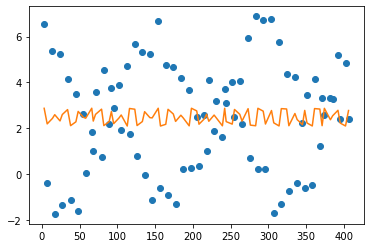

In [66]:
def func(x, a, b, c):
    return a*np.cos(b*x) + c

y = func(time,-0.39,1,2.5)

popt, pcov = curve_fit(func, time, height)
print(popt)
fita = popt[0]
fitb = round(popt[1])
fitc = popt[2]

fit_cosine = func(time, fita, fitb, fitc)

plt.plot(time, height, 'o')
plt.plot(time, fit_cosine, '-')
